## Feature Selection

Has part for normal preprocessing, then for tumor samples for PCA

In [1]:
import scanpy as sc
import anndata2ri
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

from rpy2.robjects.conversion import localconverter

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
#anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
import os

os.environ['PYTHONHASHSEED'] = '0'

In [3]:
%%R
library(scry)

In [4]:
def feat_selec(adata):
    
    np.random.seed(0)
    
    with ro.conversion.localconverter(anndata2ri.converter):
        ro.globalenv["adata"] = adata
        
        # Set seed and perform the operation
        ro.r('set.seed(0)')
        ro.r('sce <- devianceFeatureSelection(adata, assay="X")')
        
        # Retrieve the result
        sce = ro.globalenv['sce']
        
        with ro.conversion.localconverter(anndata2ri.converter):
            binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T
            
    idx = binomial_deviance.argsort()[-4000:]
    mask = np.zeros(adata.var_names.shape, dtype=bool)
    mask[idx] = True

    adata.var["highly_deviant"] = mask
    adata.var["binomial_deviance"] = binomial_deviance

    sc.pp.highly_variable_genes(adata, layer="log1p_norm")

    ax = sns.scatterplot(
        data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
    )
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)
    plt.show()
    
    return adata

In [5]:
adata3B = sc.read(
    filename="sample_3B/sample3B_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata3B_visium = sc.read(
    filename="sample_3B/sample3B_visium_QC_norm.h5ad")

In [6]:
adata26 = sc.read(
    filename="sample_26/sample26_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
adata26_visium = sc.read(
    filename="sample_26/sample26_visium_QC_norm.h5ad")

In [7]:
adata27 = sc.read(
    filename="sample_27/sample27_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [8]:
adata35 = sc.read(
    filename="sample_35/sample35_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [9]:
adata36 = sc.read(
    filename="sample_36/sample36_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [10]:
adataTICP32 = sc.read(
    filename="sample_TICP32/sampleTICP32_normalization.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


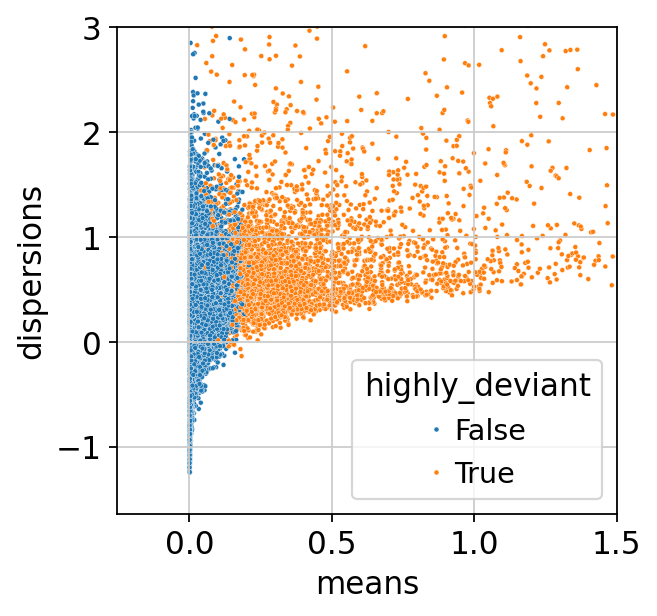

In [11]:
adata3B = feat_selec(adata3B)

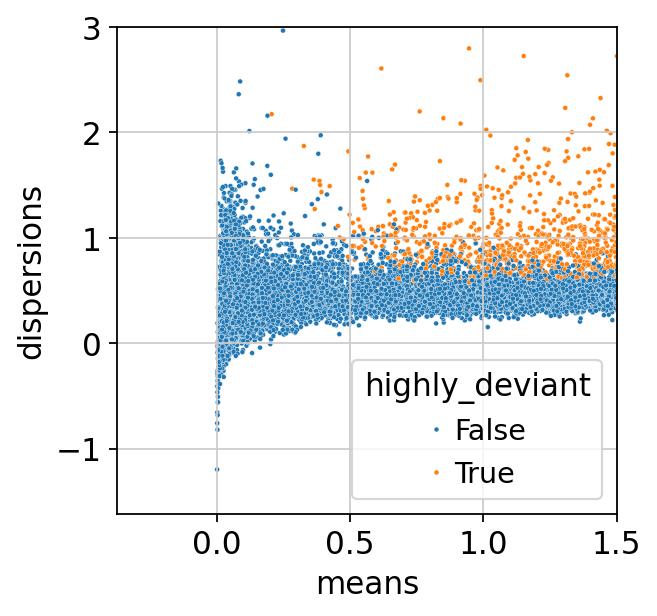

In [7]:
adata3B_visium = feat_selec(adata3B_visium)

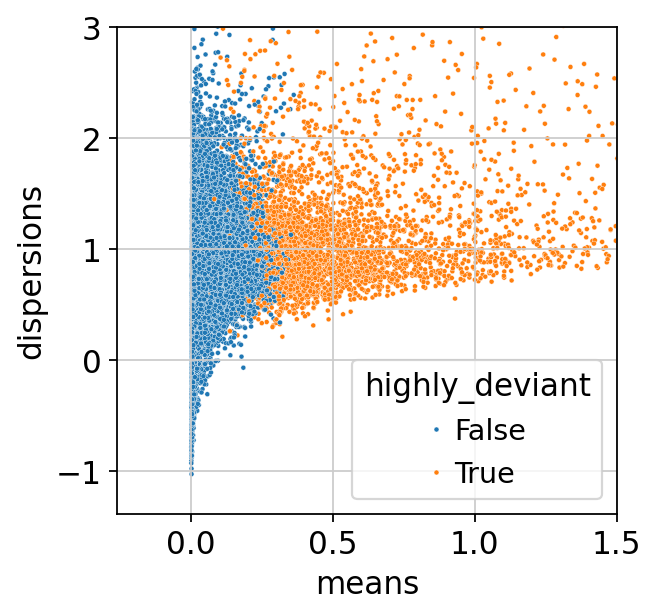

In [12]:
adata26 = feat_selec(adata26)

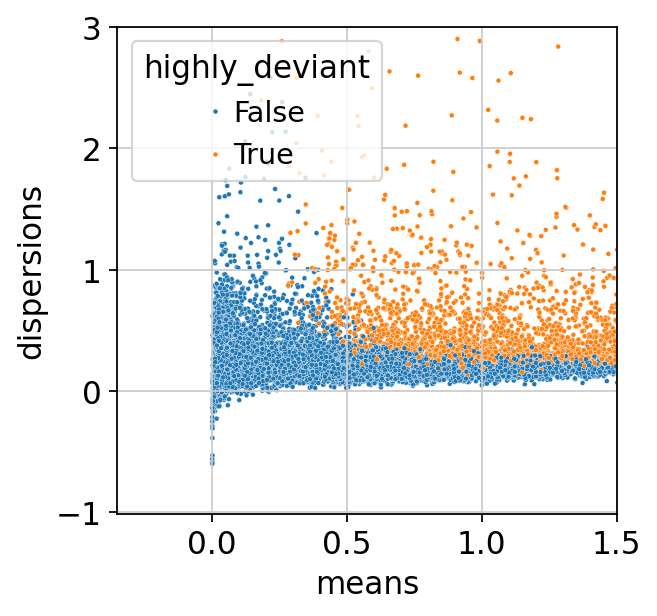

In [8]:
adata26_visium = feat_selec(adata26_visium)

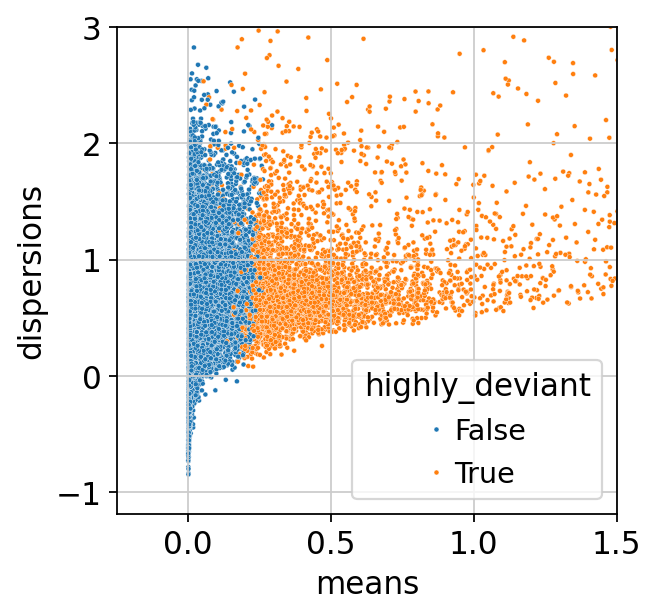

In [13]:
adata27 = feat_selec(adata27)

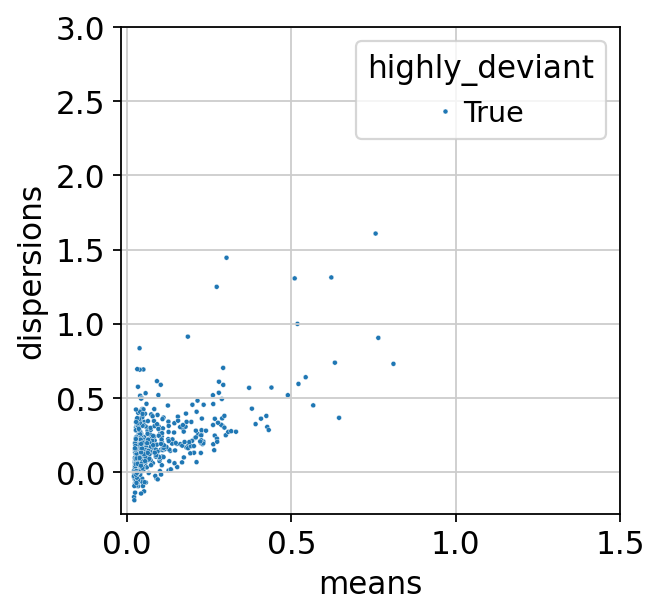

In [14]:
adata35 = feat_selec(adata35)

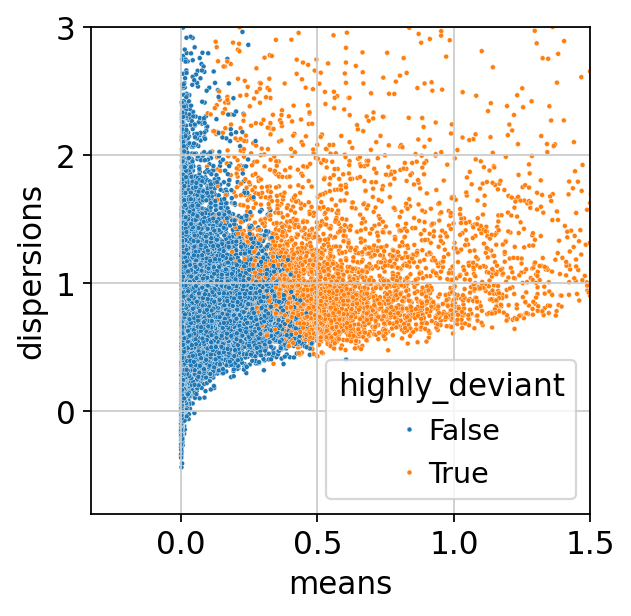

In [15]:
adata36 = feat_selec(adata36)

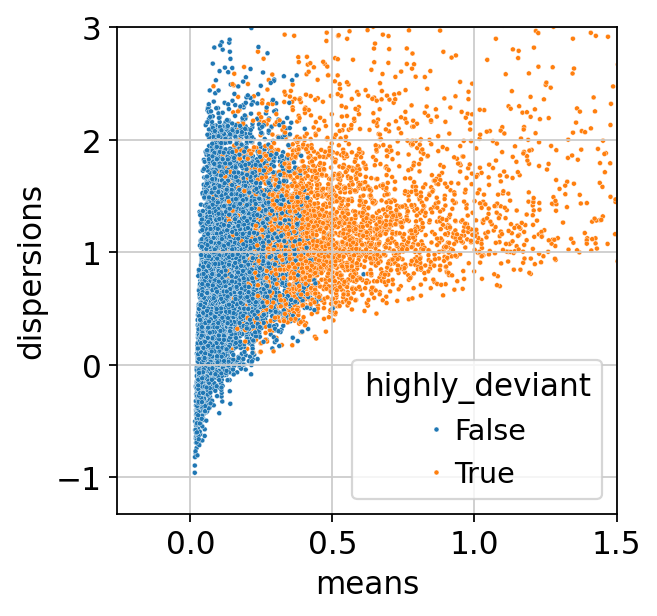

In [16]:
adataTICP32 = feat_selec(adataTICP32)

In [17]:
adata3B.var['dispersions'].max() #6.558664899196831 then 6.6049893348054445

6.569780498874029

In [18]:
adata3B.write("sample_3B/sample3B_feature_selection.h5ad")

In [9]:
adata3B_visium.write("sample_3B/sample3B_visium_QC_norm_featSelec.h5ad")

In [19]:
adata26.write("sample_26/sample26_feature_selection.h5ad")

In [10]:
adata26_visium.write("sample_26/sample26_visium_QC_norm_featSelec.h5ad")

In [20]:
adata27.write("sample_27/sample27_feature_selection.h5ad")

In [21]:
adata35.write("sample_35/sample35_feature_selection.h5ad")

In [22]:
adata36.write("sample_36/sample36_feature_selection.h5ad")

In [23]:
adataTICP32.write("sample_TICP32/sampleTICP32_feature_selection.h5ad")

## For after concat tumors :

In [24]:
obs_tumors = sc.read(
    filename="4samples/4samples_tumor_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [25]:
obs_all_cells = sc.read(
    filename="4samples/4samples_all_cells_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [26]:
adata3B_tumor = sc.read(
    filename="sample_3B/sample3B_tumor_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [27]:
adata26_tumor = sc.read(
    filename="sample_26/sample26_tumor_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [28]:
adata27_tumor = sc.read(
    filename="sample_27/sample27_tumor_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [29]:
adata36_tumor = sc.read(
    filename="sample_36/sample36_tumor_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [30]:
adata3B = sc.read(
    filename="sample_3B/sample3B_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [31]:
adata26 = sc.read(
    filename="sample_26/sample26_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [32]:
adata27 = sc.read(
    filename="sample_27/sample27_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [33]:
adata36 = sc.read(
    filename="sample_36/sample36_annotation_same_genes.h5ad")

/home/mangel/miniconda3/envs/meso2_conda_env/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


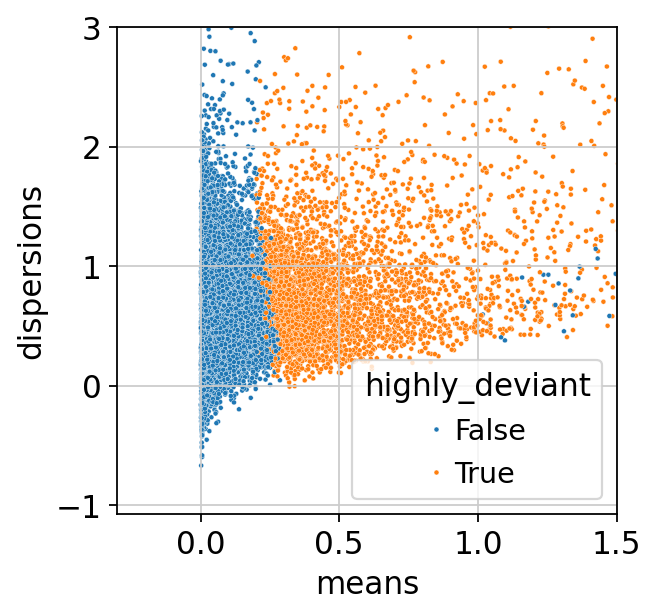

In [34]:
obs_tumors = feat_selec(obs_tumors)

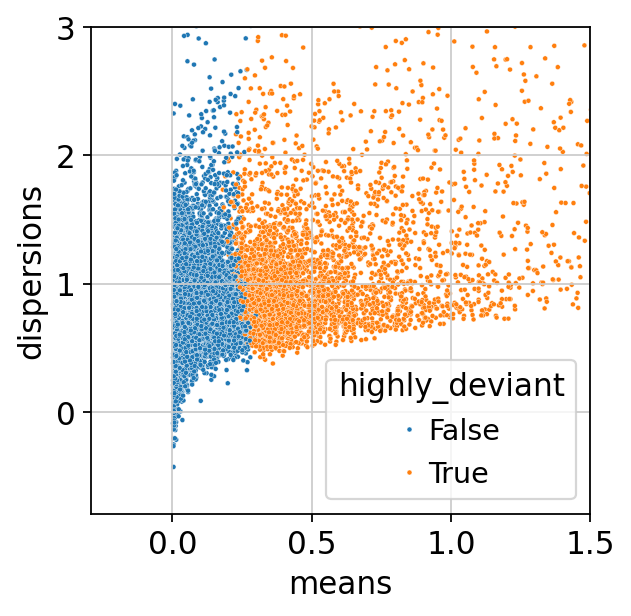

In [35]:
obs_all_cells = feat_selec(obs_all_cells)

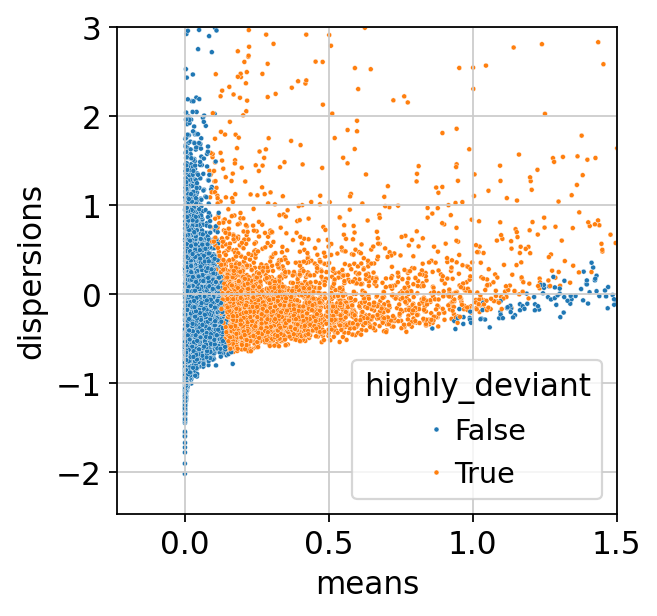

In [36]:
adata3B_tumor = feat_selec(adata3B_tumor)

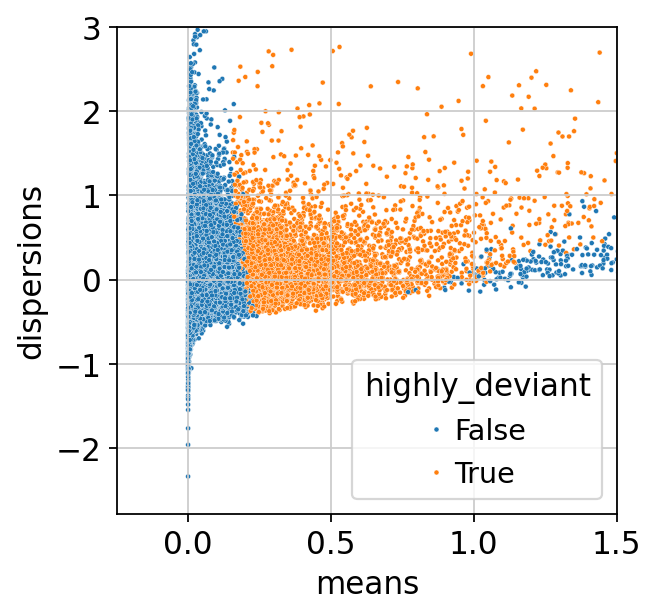

In [37]:
adata26_tumor = feat_selec(adata26_tumor)

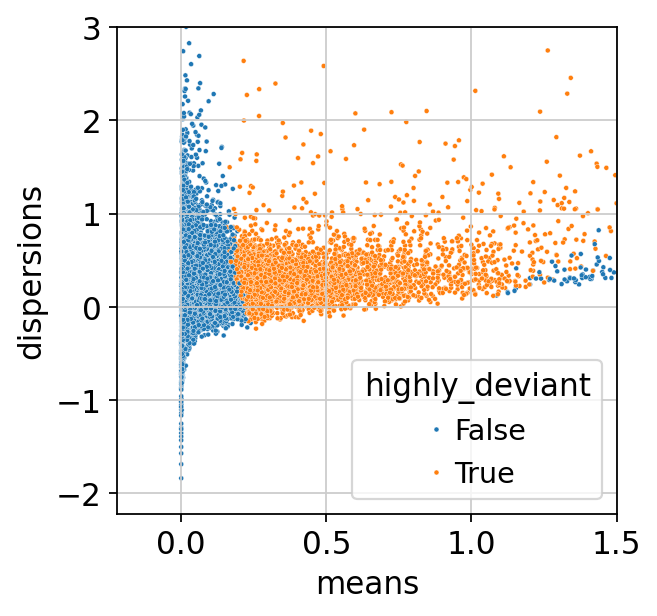

In [38]:
adata27_tumor = feat_selec(adata27_tumor)

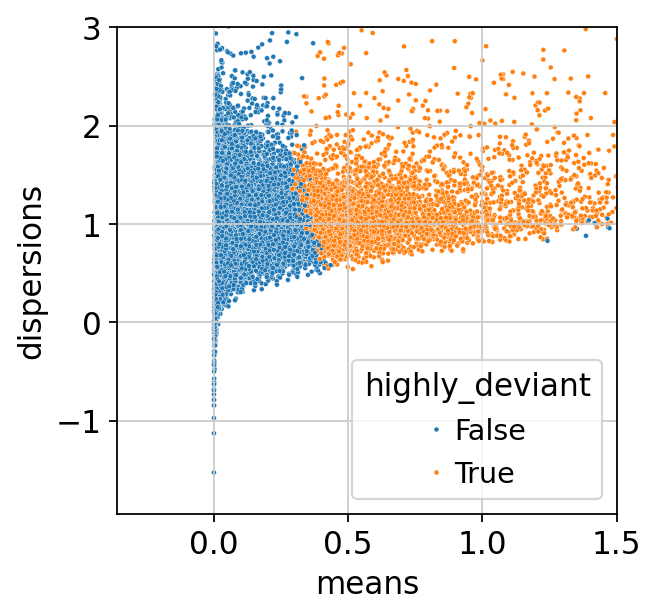

In [39]:
adata36_tumor = feat_selec(adata36_tumor)

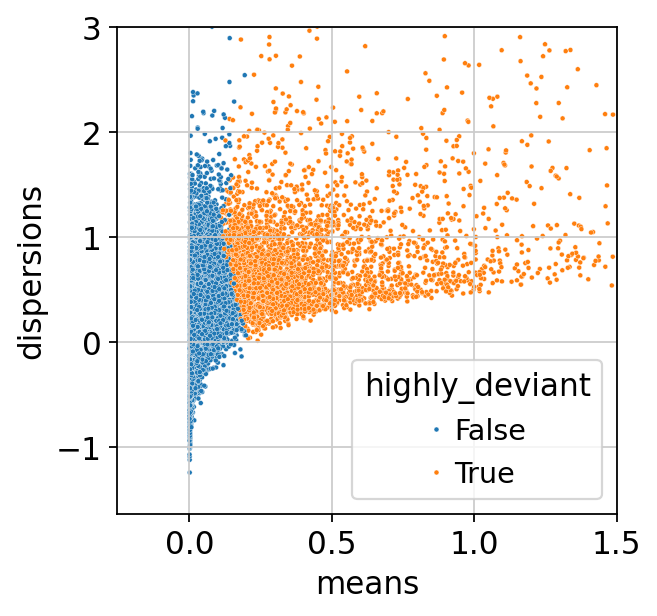

In [40]:
adata3B = feat_selec(adata3B)

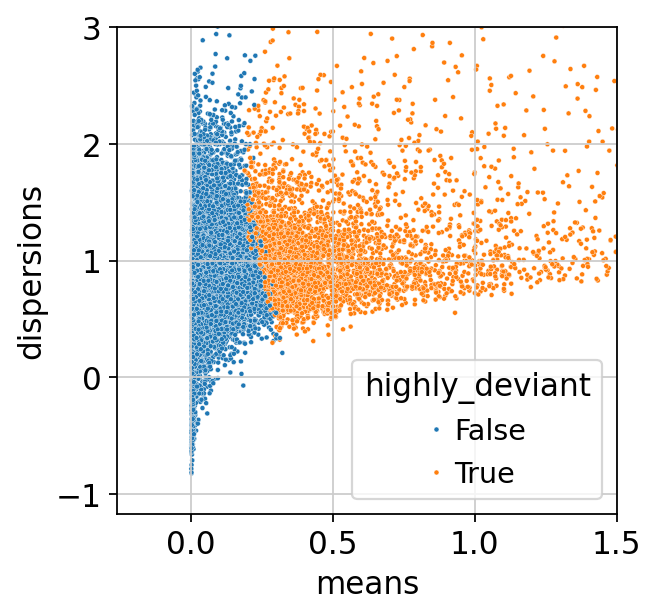

In [41]:
adata26 = feat_selec(adata26)

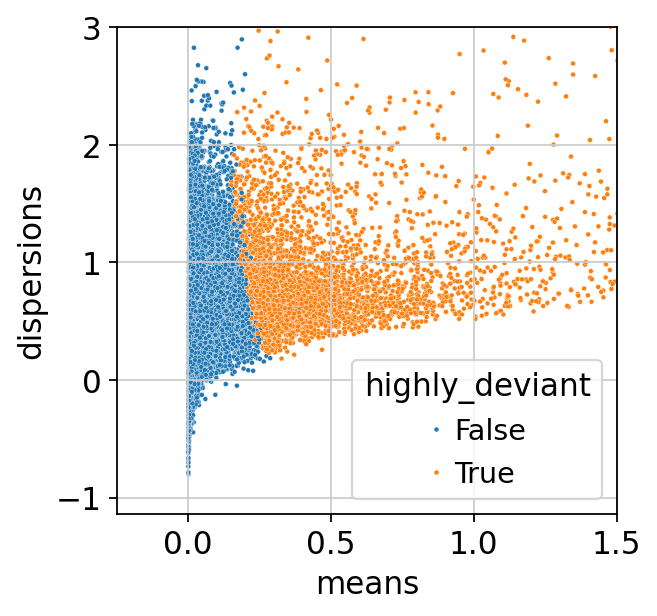

In [42]:
adata27 = feat_selec(adata27)

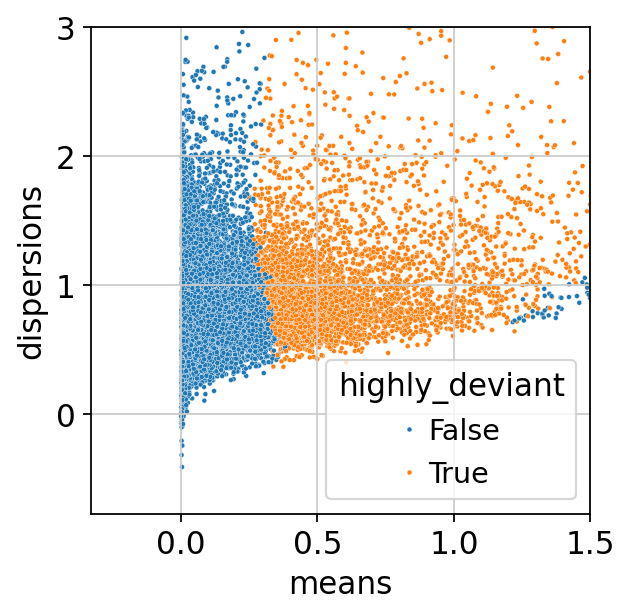

In [43]:
adata36 = feat_selec(adata36)

In [44]:
obs_tumors.write("4samples/4samples_tumor_feature_selection_same_genes.h5ad")

In [45]:
obs_all_cells.write("4samples/4samples_all_cells_feature_selection_same_genes.h5ad")

In [46]:
adata3B_tumor.write("sample_3B/sample3B_tumor_feature_selection_same_genes.h5ad")

In [47]:
adata26_tumor.write("sample_26/sample26_tumor_feature_selection_same_genes.h5ad")

In [48]:
adata27_tumor.write("sample_27/sample27_tumor_feature_selection_same_genes.h5ad")

In [49]:
adata36_tumor.write("sample_36/sample36_tumor_feature_selection_same_genes.h5ad")

In [50]:
adata3B.write("sample_3B/sample3B_feature_selection_same_genes.h5ad")

In [51]:
adata26.write("sample_26/sample26_feature_selection_same_genes.h5ad")

In [52]:
adata27.write("sample_27/sample27_feature_selection_same_genes.h5ad")

In [53]:
adata36.write("sample_36/sample36_feature_selection_same_genes.h5ad")